# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk

from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

%matplotlib inline



In [2]:
# Read your api key environment variable
load_dotenv("./Resources/.env")
api_key = os.getenv("newsapi_key")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bit_article = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [5]:
# Fetch the Ethereum news articles
eth_article = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

In [6]:
#Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Thom\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
# Define sentiment scores function
def sentiment_score(articles_list):
    sentiments_list = []

    for article in articles_list["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments_list.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu

            })

        except AttributeError:
            pass

    # Create DataFrame
    senitment_df = pd.DataFrame(sentiments_list)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    senitment_df = senitment_df[cols]
    
    return senitment_df

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment_score = sentiment_score(bit_article)
bitcoin_sentiment_score.sort_values(by= ["date"], ascending=True).head()

,date,text,compound,positive,negative,neutral
3,2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.000,1.000
50,2021-11-22,Nov 22 (Reuters) - Los Angeles Rams newly-acqu...,0.0000,0.000,0.000,1.000
56,2021-11-22,"NEW YORK, Nov 22 (Reuters) - Cyrptocurrency pr...",0.3612,0.075,0.000,0.925
54,2021-11-23,Regal movie theater.Shutterstock\r\nMovie-thea...,0.3818,0.080,0.000,0.920
23,2021-11-23,"MEXICO CITY, Nov 22 (Reuters) - The Internatio...",-0.1531,0.045,0.062,0.893


In [9]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment_score = sentiment_score(eth_article)
ethereum_sentiment_score.sort_values(by= ["date"], ascending=True).head()

,date,text,compound,positive,negative,neutral
66,2021-11-22,"NEW YORK, Nov 22 (Reuters) - Cyrptocurrency pr...",0.3612,0.075,0.000,0.925
1,2021-11-23,Ethereum has been on a tear this year. Its out...,0.6542,0.178,0.000,0.822
87,2021-11-23,"NEW YORK, Nov 23 (Reuters) - The dollar index ...",0.0000,0.000,0.000,1.000
62,2021-11-23,The ConstitutionDAO group did not win its bid ...,-0.4717,0.000,0.081,0.919
88,2021-11-23,I must begin this article by stating that the ...,0.1027,0.041,0.000,0.959


In [10]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_score.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.107337,0.063090,0.038500,0.898390
std,0.365985,0.064512,0.058303,0.089362
min,-0.802000,0.000000,0.000000,0.660000
25%,-0.006450,0.000000,0.000000,0.845750
50%,0.000000,0.054000,0.000000,0.919500
75%,0.386225,0.114000,0.069250,1.000000
max,0.790600,0.230000,0.246000,1.000000


In [11]:
# Describe the Ethereum Sentiment
ethereum_sentiment_score.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.157725,0.073270,0.031650,0.895010
std,0.383817,0.076789,0.055326,0.094081
min,-0.802000,0.000000,0.000000,0.640000
25%,0.000000,0.000000,0.000000,0.823750
50%,0.109050,0.068500,0.000000,0.921000
75%,0.401900,0.125000,0.060000,1.000000
max,0.946000,0.360000,0.246000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has a greater positive score than bitcoin

Q: Which coin had the highest compound score?

A: Ethereum has a greater compound score than bitcoin

Q. Which coin had the highest positive score?

A: Ethereum has also the highedt positive score

Conculsion : based on this analysis Ethereum has a better opinion than bitcoin over the last month.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'also', 'say', 'reuters' , 'char'}

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    re_words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    limited = [lemmatizer.lemmatize(word) for word in re_words]
    limited_verbs = [lemmatizer.lemmatize(word, pos ='v') for word in limited]
   
    # Convert the words to lowercase & Remove the stop words
    tokens = [word.lower() for word in limited_verbs 
                  if word.lower() not in sw.union(sw_addon)]

    return tokens

In [15]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment_score['token'] = [tokenizer(text) for text in bitcoin_sentiment_score['text']]
bitcoin_sentiment_score.head()

,date,text,compound,positive,negative,neutral,token
0,2021-12-12,"Image source, AFP via Getty Images\r\nImage ca...",-0.4019,0.000,0.078,0.922,"[image, source, afp, via, getty, imagesimage, ..."
1,2021-12-06,The plant opening northeast of Niagara Falls t...,0.0000,0.000,0.000,1.000,"[plant, open, northeast, niagara, falls, month..."
2,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.000,0.901,"[earlier, year, nothing, release, pair, relati..."
3,2021-11-22,"MIZATA, El Salvador/LONDON, Nov 22 (Reuters) -...",0.0000,0.000,0.000,1.000,"[mizata, el, salvadorlondon, nov, el, salvador..."
4,2021-12-23,Dec 23 (Reuters) - The U.S. Securities and Exc...,0.5859,0.142,0.000,0.858,"[dec, us, securities, exchange, commission, ve..."


In [16]:
# Create a new tokens column for Ethereum
ethereum_sentiment_score['token'] = [tokenizer(text) for text in ethereum_sentiment_score['text']]
ethereum_sentiment_score.head()

,date,text,compound,positive,negative,neutral,token
0,2021-11-24,More than $1.2 million has already been spent ...,0.0000,0.000,0.000,1.000,"[million, ha, already, spend, gas, feesone, re..."
1,2021-11-23,Ethereum has been on a tear this year. Its out...,0.6542,0.178,0.000,0.822,"[ethereum, ha, tear, year, outperform, bitcoin..."
2,2021-12-02,Blockchain startup MonoX Finance said on Wedne...,-0.0516,0.074,0.079,0.847,"[blockchain, startup, monox, finance, wednesda..."
3,2021-11-30,"On Monday, Budweiser joined the non-fungible t...",-0.1531,0.000,0.045,0.955,"[monday, budweiser, join, nonfungible, token, ..."
4,2021-12-01,"Earlier this year, Nothing released a pair of ...",0.5106,0.099,0.000,0.901,"[earlier, year, nothing, release, pair, relati..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
def bigramize(sentiment_score_df, N):    
    corpus = [ ' '.join(list) for list in sentiment_score_df['token']]
    big_string =  ' '.join(corpus)
    token = word_tokenize(big_string)
    bigram = ngrams(token, n= N)
    
    return bigram


In [19]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigram = bigramize(bitcoin_sentiment_score, 2)

In [20]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram = bigramize(ethereum_sentiment_score, 2)

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_bigram_count = pd.DataFrame(token_count(bitcoin_bigram,10))
bitcoin_bigram_count.head(10)

,0,1
0,"(el, salvador)",8
1,"(president, nayib)",6
2,"(nayib, bukele)",6
3,"(digital, currency)",6
4,"(computer, scientist)",5
5,"(dec, bitcoin)",5
6,"(world, largest)",5
7,"(largest, cryptocurrency)",5
8,"(new, york)",5
9,"(illustration, take)",4


In [23]:
# Use token_count to get the top 10 words for Ethereum
ethereum_bigram_count = pd.DataFrame(token_count(ethereum_bigram,10))
ethereum_bigram_count.head(10)

,0,1
0,"(nonfungible, token)",6
1,"(illustration, take)",5
2,"(new, york)",5
3,"(ear, earbuds)",4
4,"(bitcoin, ethereum)",4
5,"(digital, asset)",4
6,"(venture, capital)",4
7,"(digital, currency)",3
8,"(representations, cryptocurrencies)",3
9,"(cryptocurrencies, bitcoin)",3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [25]:
def bigstring(sentiment_score_df):    
    corpus = [ ' '.join(list) for list in sentiment_score_df['token']]
    big_string =  ' '.join(corpus)
    
    return big_string

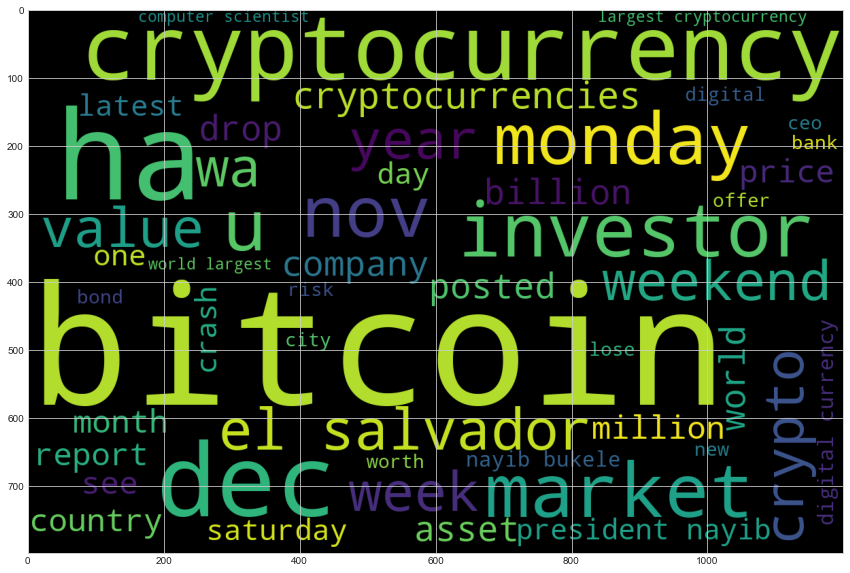

In [26]:
# Generate the Bitcoin word cloud
input_bitcoin = bigstring(bitcoin_sentiment_score)

wc_bit = WordCloud(width=1200, height=800, max_words=50).generate(input_bitcoin)
plt.imshow(wc_bit);

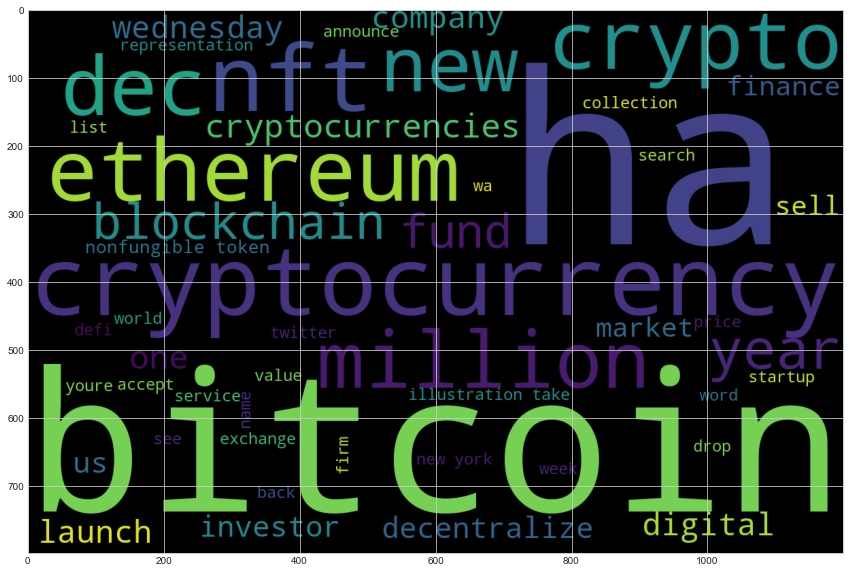

In [27]:
# Generate the Ethereum word cloud
input_eth = bigstring(ethereum_sentiment_score)

wc_eth = WordCloud(width=1200, height=800, max_words=50).generate(input_eth)
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [28]:
import spacy
from spacy import displacy

In [29]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [30]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [31]:
# Concatenate all of the Bitcoin text together
corpus_bitcoin = ''
for text in bitcoin_sentiment_score['text']:
    corpus_bitcoin += text + ' ' 

In [32]:
# Run the NER processor on all of the text
tokens_bitcoin = nlp(corpus_bitcoin)

# Add a title to the document
tokens_bitcoin.user_data["title"] = "Bitcoin's news named entity recognition"

In [33]:
# Render the visualization
displacy.render(tokens_bitcoin, style="ent")

In [34]:
# List all Entities end their label
list_ent_bitcoin = [(ent.text , ent.label_) for ent in tokens_bitcoin.ents]
list_ent_bitcoin

[('AFP', 'ORG'),
 ('Getty Images', 'ORG'),
 ('Modi', 'GPE'),
 ('more than 70 million', 'MONEY'),
 ('Twitter', 'PRODUCT'),
 ('Indian', 'NORP'),
 ("Narendra Modi's", 'PERSON'),
 ('Twitter', 'PRODUCT'),
 ('India', 'GPE'),
 ('Niagara Falls', 'PERSON'),
 ('this month', 'DATE'),
 ('Somerset', 'GPE'),
 ('N.Y.', 'GPE'),
 ('$550 million', 'MONEY'),
 ('Terawulf', 'DATE'),
 ('150-megawatt', 'QUANTITY'),
 ('Earlier this year', 'DATE'),
 ('99', 'MONEY'),
 ('OnePlus', 'ORG'),
 ('El Salvador/', 'GPE'),
 ('Reuters', 'ORG'),
 ('El Salvador', 'GPE'),
 ('first', 'ORDINAL'),
 ('Bitcoin City', 'GPE'),
 ('$1 billion', 'MONEY'),
 ('Nayib Bukele', 'PERSON'),
 ('Dec 23', 'DATE'),
 ('Reuters', 'ORG'),
 ('The U.S. Securities and Exchange Commission', 'ORG'),
 ('two', 'CARDINAL'),
 ('Twitter', 'PRODUCT'),
 ('TechCrunch', 'ORG'),
 ('Indian', 'NORP'),
 ("Narendra Modi's", 'PERSON'),
 ('Twitter', 'PRODUCT'),
 ('+1087', 'CARDINAL'),
 ('November 29, 2021', 'DATE'),
 ('REUTERS', 'ORG'),
 ('Dado Ruvic/IllustrationDec', 

---

### Ethereum NER

In [35]:
# Concatenate all of the Ethereum text together
corpus_ethereum = ''
for text in ethereum_sentiment_score['text']:
    corpus_ethereum += text + ' ' 

In [36]:
# Run the NER processor on all of the text
tokens_ethereum = nlp(corpus_ethereum)

# Add a title to the document
tokens_ethereum.user_data["title"] = "ETH's News named entity recognition"

In [37]:
# Render the visualization
displacy.render(tokens_ethereum, style="ent")

In [50]:
# List all Entities with their label except those with the label 'CARDINAL'
list_ent_eth = [(ent.text , ent.label_) for ent in tokens_ethereum.ents if not ent.label_ == ("CARDINAL" and 'MONEY') ]
list_ent_eth

[('One', 'CARDINAL'),
 ('13', 'CARDINAL'),
 ('the Official Edition of the', 'WORK_OF_ART'),
 ('Constitution', 'LAW'),
 ('Sothebys', 'GPE'),
 ('last Thursday', 'TIME'),
 ('night', 'TIME'),
 ('ConstitutionDAO', 'PERSON'),
 ('this year', 'DATE'),
 ('this year', 'DATE'),
 ('Mark Cuban', 'PERSON'),
 ('Wednesday', 'DATE'),
 ('Ars Te', 'ORG'),
 ('Monday', 'DATE'),
 ('Budweiser', 'ORG'),
 ('first', 'ORDINAL'),
 ('Earlier this year', 'DATE'),
 ('OnePlus', 'ORG'),
 ('Erin McDowell/Insider', 'PERSON'),
 ('White Castle', 'FAC'),
 ('Twitter', 'PRODUCT'),
 ('Nicholas Merten', 'PERSON'),
 ('May 2018', 'DATE'),
 ('Shutterstock', 'ORG'),
 ('Regal Cinemas', 'PERSON'),
 ('more than 500', 'CARDINAL'),
 ('dozens', 'CARDINAL'),
 ('Google', 'ORG'),
 ('Search', 'GPE'),
 ('2021', 'DATE'),
 ('Squid Game', 'ORG'),
 ('year-long', 'DATE'),
 ('Xboxs', 'ORG'),
 ('Halo Infinite', 'ORG'),
 ('MicroStrategy', 'ORG'),
 ('Michael SaylorJoe Raedle/Getty Images', 'PERSON'),
 ('ETF', 'ORG'),
 ('December 13th', 'DATE'),
 ('Th

---